In [27]:
import sys
sys.path.append("../../src")

from datasets.misr_dataset import MISRDataset
from degradation_model.basic_degradation_model import BasicDegradationModel
from custom_dataclasses.hotspot_parameters import HotspotParametersRanges
import cv2
import os


In [28]:

#get path of the folder containing the file
basic_degradation_model = BasicDegradationModel(
    log_file_name=os.path.join(os.getcwd(), "degradation_model.log"),
    source_resolution=70,
    target_resolution=280,
    source_error=0.5,
    target_error=1,
    interpolation_method=cv2.INTER_CUBIC,
    n_iterations=15,
    radiometric_error_correction_parameters={"noise_factor": 0.5},
    transfer_function_parameters={"sigmaX_variance_param": 0.2,
                                  "sigmaY_variance_param": 0.2}
)

path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "data","training","DATASET")
dataset = MISRDataset(log_path=os.path.join(os.getcwd(), "dataset.log"),
                      folder_path=path,
                      degradation_model=basic_degradation_model,
                      images_to_keep=10,
                      hotspot_generation_parameter_ranges=HotspotParametersRanges(
                            hotspot_probability=1,
                            max_intensity_multiplier_range=(1, 1.05),
                            hotspot_size_x_range=(1, 6),
                            hotspot_size_y_range=(1, 6),
                            sigma_range=(0.4, 0.6),
                      )
)
print(len(dataset))


/home/pmassaro/multi-image-super-resolution-thesis/src/datasets/degradation_model.log
/home/pmassaro/multi-image-super-resolution-thesis/src/datasets/dataset.log
13764


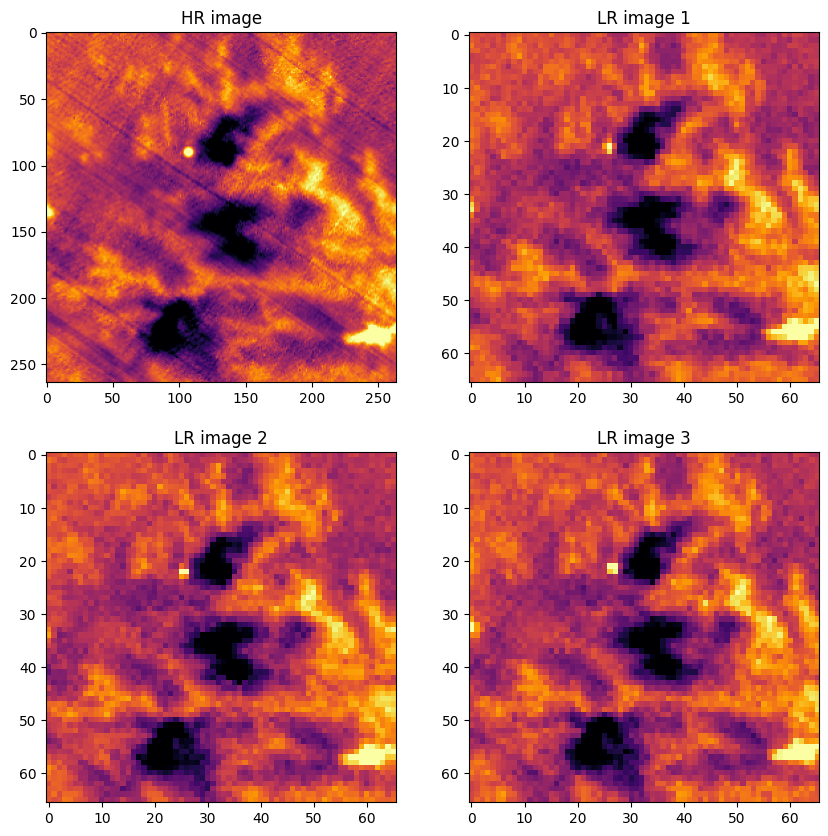

In [35]:
dataset.plot_example(13102)

/home/pmassaro/multi-image-super-resolution-thesis/data/validation/forestcrops/ecostress/urban/milan/doy2018233132515_LWIR1_17.tif


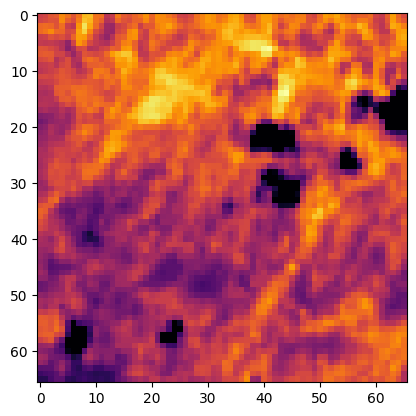

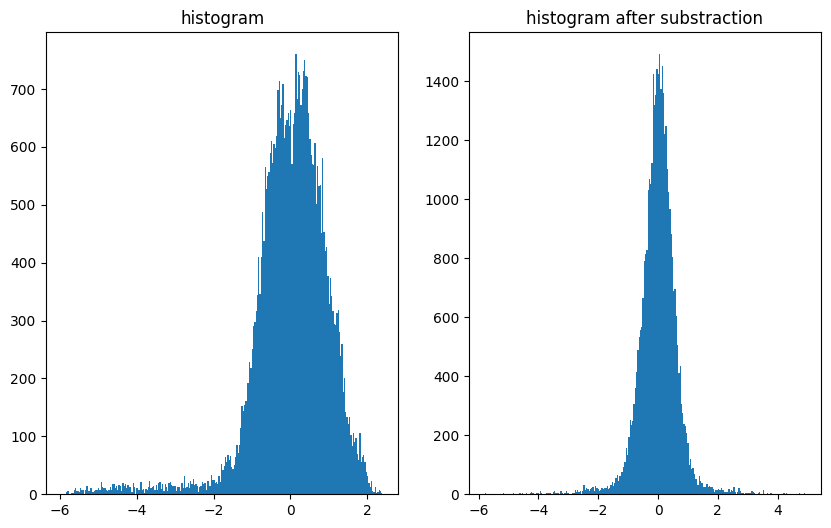

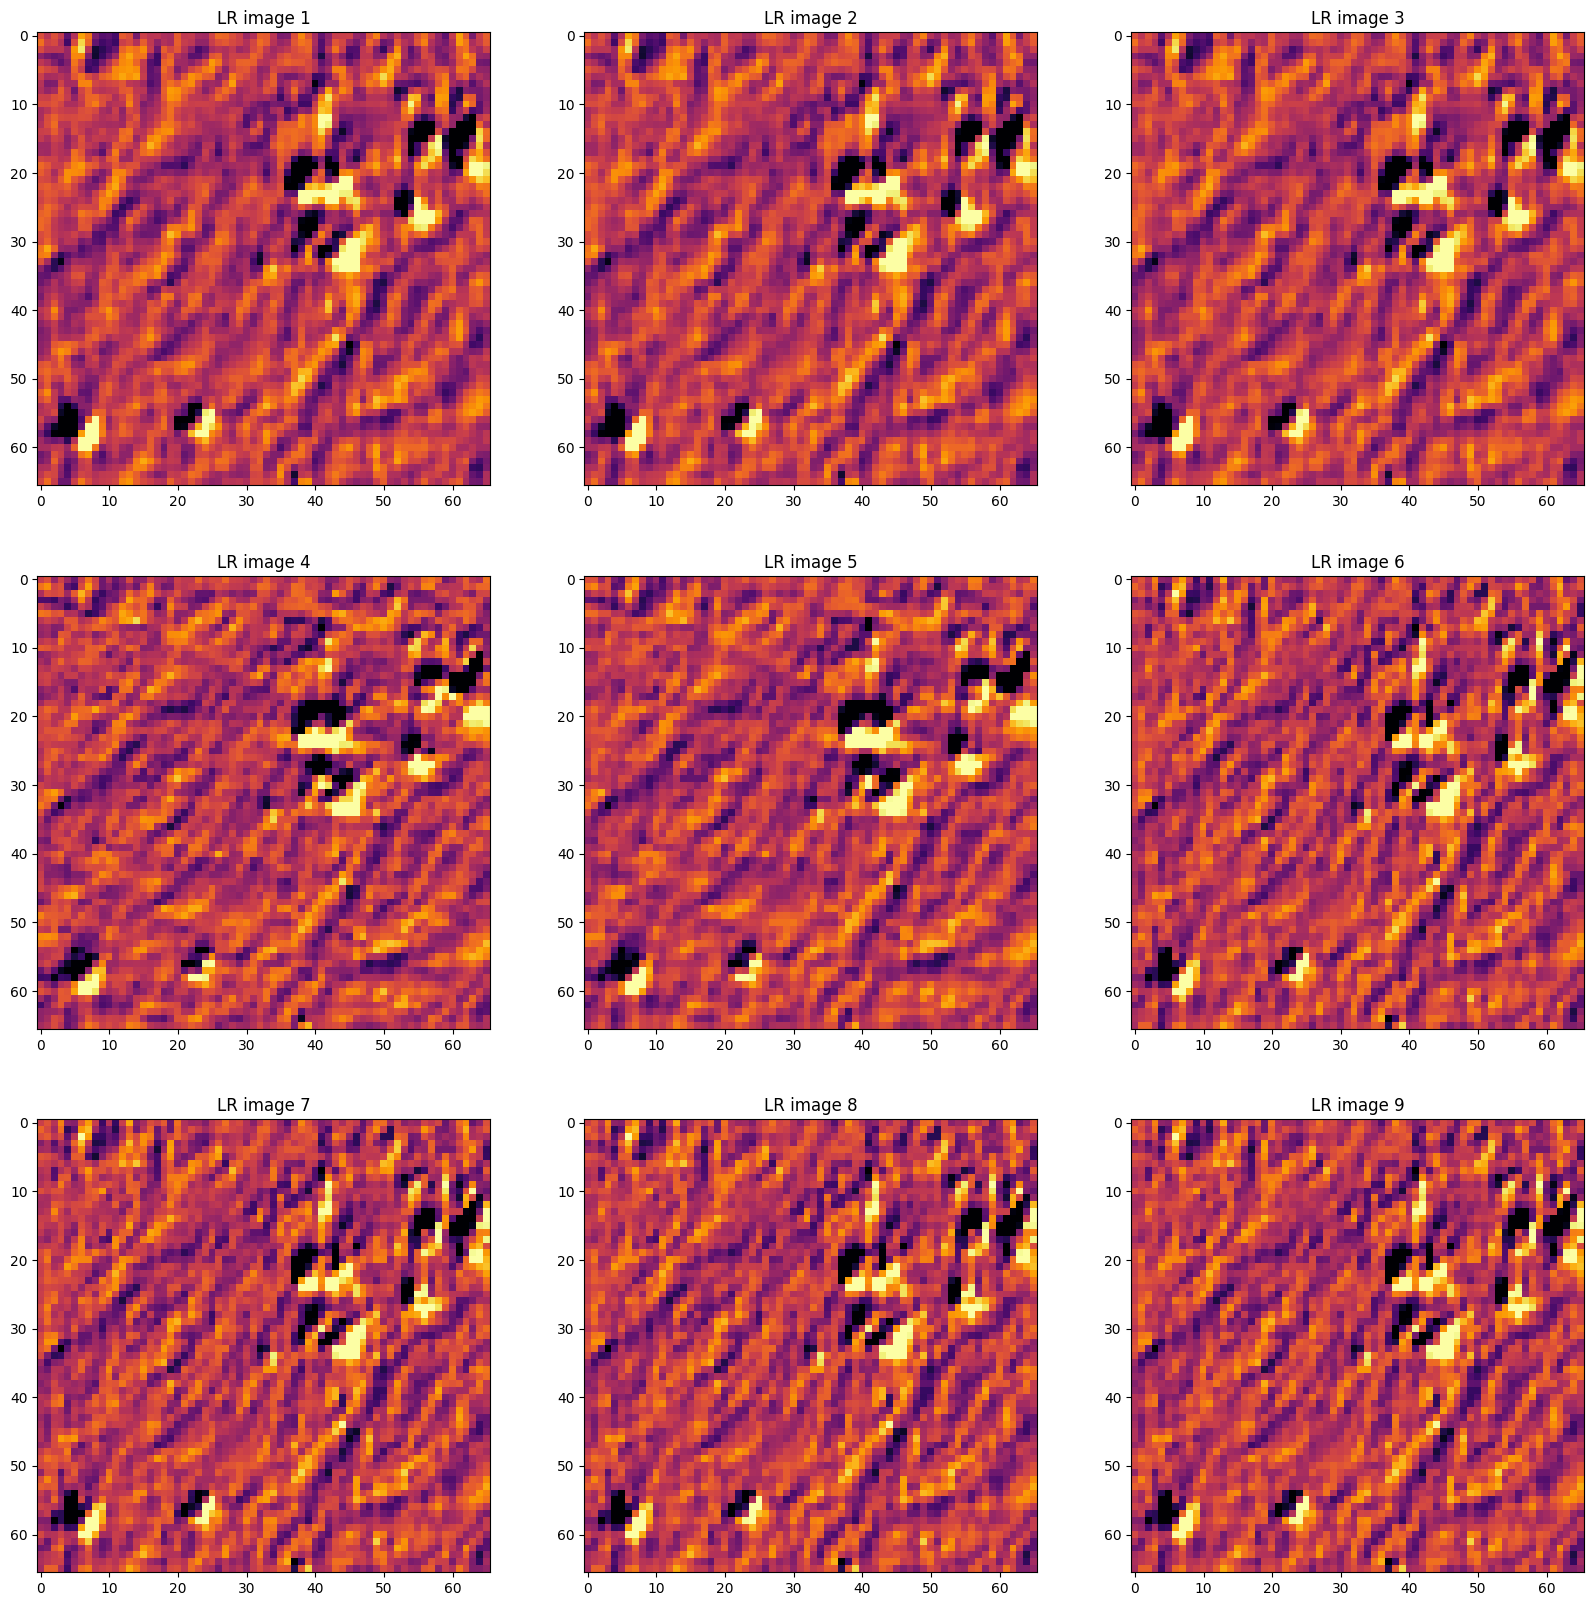

In [18]:
dataset.plot_lr_images_with_substracted_mean(3)